### Contents

- **Timestamp:** The time in which the interview was conducted
- **Age:** Age of the participant
- **Gender:** Gender of the participant
- **Country:** Country in which the participant lives
- **state:** If you live in the United States, which state or territory do you live in?
- **self_employed:** Are you self-employed?
- **family_history:** Do you have a family history of mental illness?
- **treatment:** Have you sought treatment for a mental health condition?
- **work_interfere:** If you have a mental health condition, do you feel that it interferes with your work?
- **no_employees:** How many employees does your company or organization have?
- **remote_work:** Do you work remotely (outside of an office) at least 50% of the time?
- **tech_company:** Is your employer primarily a tech company/organization?
- **benefits:** Does your employer provide mental health benefits?
- **care_options:** Do you know the options for mental health care your employer provides?
- **wellness_program:** Has your employer ever discussed mental health as part of an employee wellness program?
- **seek_help:** Does your employer provide resources to learn more about mental health issues and how to seek help?
- **anonymity:** Is your anonymity protected if you choose to take advantage of mental health or substance abuse   treatment resources?
- **leave:** How easy is it for you to take medical leave for a mental health condition?
- **mental_health_consequence:** Do you think that discussing a mental health issue with your employer would have negative consequences?
- **phys_health_consequence:** Do you think that discussing a physical health issue with your employer would have negative consequences?
- **coworkers:** Would you be willing to discuss a mental health issue with your coworkers?
- **supervisor:** Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- **mental_health_interview:** Would you bring up a mental health issue with a potential employer in an interview?
- **phys_health_interview:** Would you bring up a physical health issue with a potential employer in an interview?
- **mental_vs_physical:** Do you feel that your employer takes mental health as seriously as physical health?
- **obs_consequence:** Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- **comments:** Any additional notes or comments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
sns.set(style="darkgrid",palette="muted")
%matplotlib inline

In [2]:
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


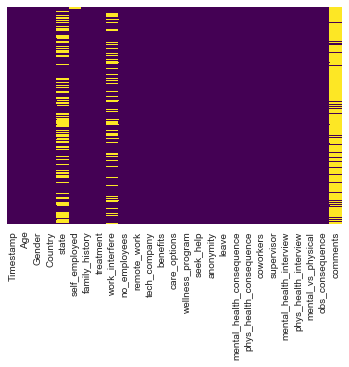

In [3]:
# check for NaN values
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
# drop the comments column,we don't have much use for it and it has a bunch of NaN values
survey.drop('comments', axis=1,inplace=True)

In [5]:
# also drop the timestamp and state columns, we don't have much use for the first and the second has too many NaN
# values to be any useful
survey.drop(['Timestamp','state'], axis=1,inplace=True)

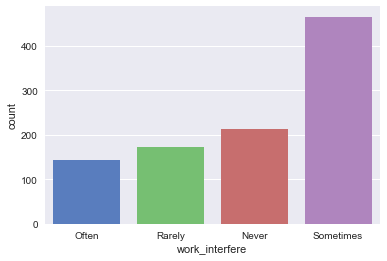

In [6]:
# now lets take a look at the work interfere column.I tells us if the person thinks that his/hers mental health has 
# any impact on the work
sns.countplot(survey['work_interfere'])

In [7]:
# we have lots o missing data, and most of the people that answer said 'sometimes'.
# that's not very useful right now, so let's drop the column (we might revisit this later)
survey.drop('work_interfere', axis=1,inplace=True)

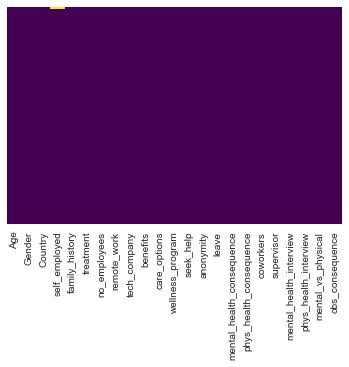

In [8]:
#lets take another look at the data
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# self employed has some missing values, but we can just drop those rows
survey.dropna(inplace=True)

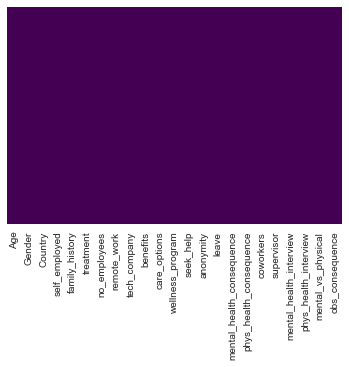

In [10]:
# last look to see if it's all ok
sns.heatmap(survey.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# lets fix the remaining issues
survey = survey.reset_index(drop=True)

In [12]:
print("number of unique responses to each question: \n")

for col in list(survey.columns):
    print(col,": ", survey[col].nunique())

number of unique responses to each question: 

Age :  53
Gender :  49
Country :  48
self_employed :  2
family_history :  2
treatment :  2
no_employees :  6
remote_work :  2
tech_company :  2
benefits :  3
care_options :  3
wellness_program :  3
seek_help :  3
anonymity :  3
leave :  5
mental_health_consequence :  3
phys_health_consequence :  3
coworkers :  3
supervisor :  3
mental_health_interview :  3
phys_health_interview :  3
mental_vs_physical :  3
obs_consequence :  2


In [13]:
# we might have a problem in the Gender column, there are 48 unique responses
survey['Gender'].unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [14]:
# well....fuck
# let's clean it the best we can
def gender_identifier(string):
    male_strings = ['male', 'Male', 'M', 'm', 'maile','Cis Male', 'Mal', 'Male (CIS)',  'Make', 
                    'Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr','Cis Man']
    female_strings = ['Female', 'female','Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 
                      'Female ', 'cis-female/femme','Female (cis)','femail']
    other_strings = ['Trans-female','something kinda male?','queer/she/they','non-binary', 'Nah', 
                     'All', 'Enby', 'fluid', 'Genderqueer',  'Androgyne', 'Agender', 'Guy (-ish) ^_^', 
                     'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)','queer',   
                     'A little about you','p', 'ostensibly male, unsure what that really means', 'Male-ish']
    
    if string in male_strings:
        return 'male'
    elif string in female_strings:
        return 'female'
    elif string in other_strings:
        return 'other/non-binary/trans'
    
survey['Gender'] = survey['Gender'].apply(gender_identifier)

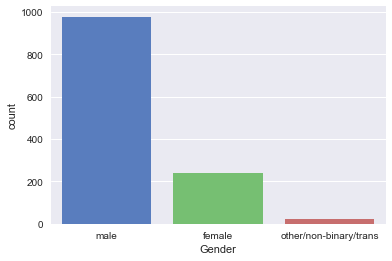

In [15]:
sns.countplot(survey['Gender'])

In [16]:
# last, lets fix the age
def fix_age(age):
    if (age>100 or age<=0):
        return np.nan
    return int(age)

survey['Age'] = survey['Age'].apply(fix_age)


In [17]:
# fill in the NaN with the mean age
def fill_age(age):
    if np.isnan(age):
        return int(survey['Age'].mean())
    return int(age)

survey['Age'] = survey['Age'].apply(fill_age)

In [44]:
survey['Age'].unique()

array([46, 36, 29, 31, 41, 33, 35, 34, 37, 32, 30, 42, 40, 27, 38, 50, 24,
       18, 28, 26, 22, 44, 23, 19, 25, 39, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49,  5, 53, 61,  8, 11, 72])

In [48]:
# still some weird values like age lower  than 15
survey[survey["Age"]<=15]['Age'].unique()

array([ 5,  8, 11])

In [54]:
survey.drop(survey[survey["Age"]<=15].index, inplace=True)

# Exploratory data Analysis and Visualisations

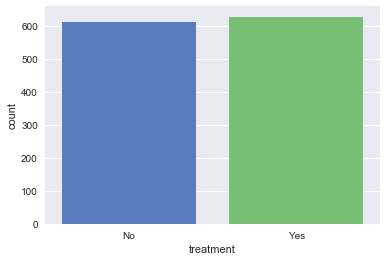

In [55]:
# our final goal is to predict wheather or not an employee seek treatment 
# given his/hers perception of the work enviroment and each factor contribute the most
# first lets see how much of our sample did an didn't seek treatment

sns.countplot(survey['treatment'])

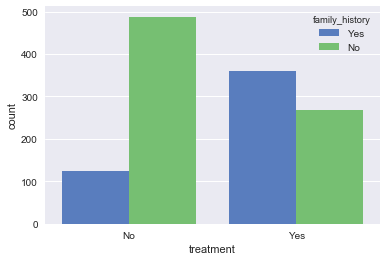

In [20]:
# maybe family history has an impact?
sns.countplot(x='treatment', hue='family_history', data=survey)

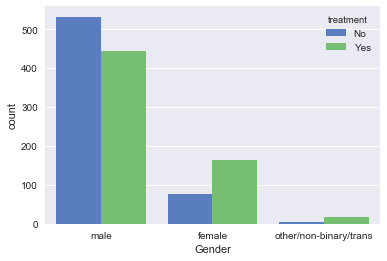

In [21]:
sns.countplot(x='Gender', hue='treatment', data=survey)

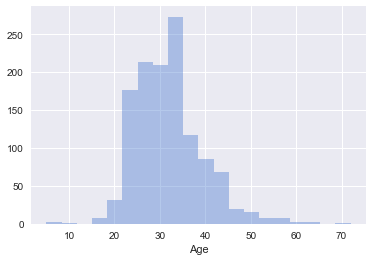

In [22]:
# the majority of people who didn't seek help had no family history
# now let's chet the age distribution
sns.distplot(survey['Age'], kde=False, bins=20)

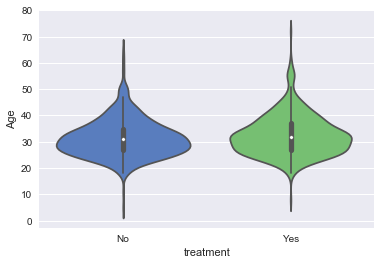

In [23]:
sns.violinplot(x="treatment", y="Age", data=survey)
#not much correlation between age and seeking treatment, the two ditributions look very similar

In [24]:
# now let's analyse the work enviroment

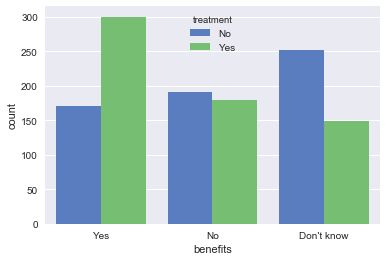

In [25]:
# benefits: Does your employer provide mental health benefits?
sns.countplot(x='benefits',hue='treatment', data=survey)
# not much to see

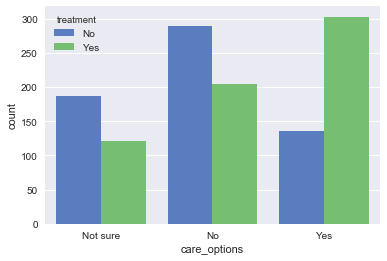

In [26]:
# care_options: Do you know the options for mental health care your employer provides?
sns.countplot(x='care_options',hue='treatment', data=survey)
# not much to see

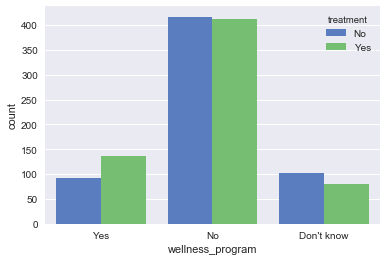

In [27]:
# wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
sns.countplot(x='wellness_program',hue='treatment', data=survey)
# most employers didn't discuss mental health as part  of the wellness program

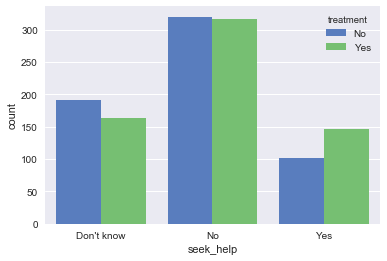

In [28]:
# seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
sns.countplot(x='seek_help',hue='treatment', data=survey)
# same as before! although a slight increase in 'don't know'

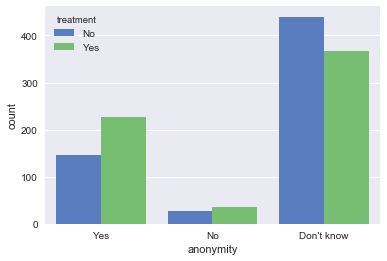

In [29]:
# anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
sns.countplot(x='anonymity',hue='treatment', data=survey)
# most people don't know the answer

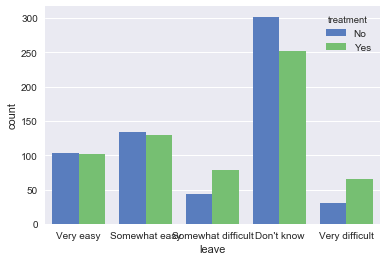

In [30]:
# leave: How easy is it for you to take medical leave for a mental health condition?
sns.countplot(x='leave',hue='treatment', data=survey)
# most people don't know how easy it would be to take a medical leave with a mental health condition

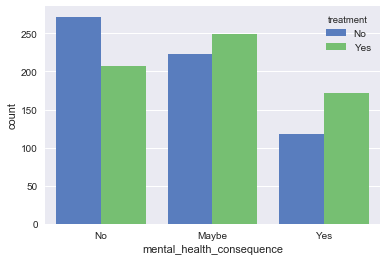

In [31]:
# mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
sns.countplot(x='mental_health_consequence',hue='treatment', data=survey)

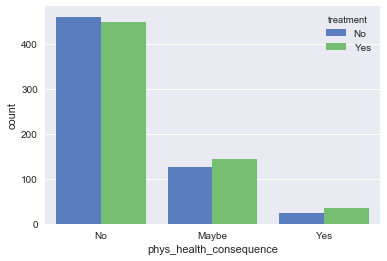

In [32]:
# phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
sns.countplot(x='phys_health_consequence',hue='treatment', data=survey)

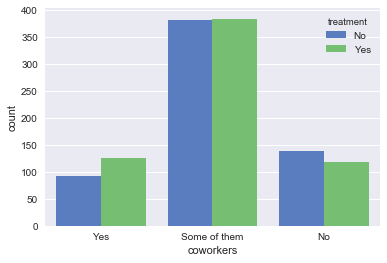

In [33]:
# coworkers: Would you be willing to discuss a mental health issue with your coworkers?
sns.countplot(x='coworkers',hue='treatment', data=survey)

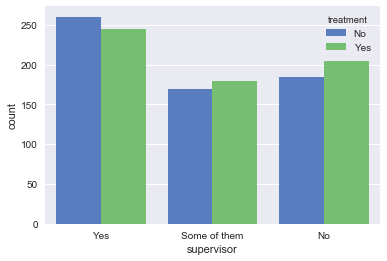

In [34]:
# supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
sns.countplot(x='supervisor',hue='treatment', data=survey)

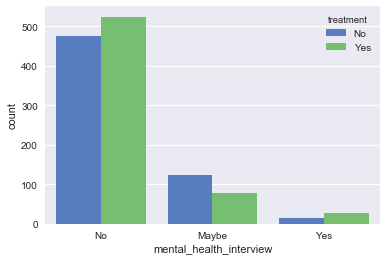

In [35]:
# mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
sns.countplot(x='mental_health_interview',hue='treatment', data=survey)
# unsurprisingly

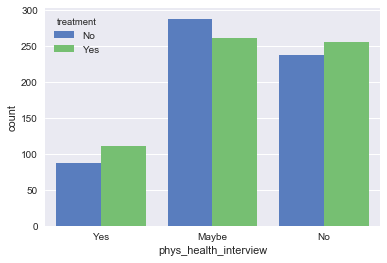

In [36]:
# phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
sns.countplot(x='phys_health_interview',hue='treatment', data=survey)

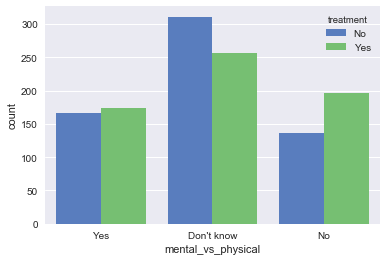

In [37]:
# mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
sns.countplot(x='mental_vs_physical',hue='treatment', data=survey)

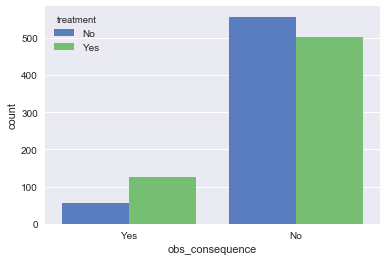

In [38]:
# obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
sns.countplot(x='obs_consequence',hue='treatment', data=survey)

In [39]:
# now lets check the percentage of people who seek treatment per country
by_country = pd.DataFrame(columns=['country', 'percentage'])

In [40]:
by_country['country'] = survey['Country'].unique()

In [41]:
def get_percentage (country):
    total = survey[survey['Country'] == country]['treatment'].count()
    treated = survey[(survey['Country'] == country) & (survey['treatment'] == 'Yes')]['treatment'].count()
    return (treated/total)*100

by_country['percentage'] = by_country['country'].apply(get_percentage)

In [42]:
by_country['percentage'].mean()

32.79984725867279

In [43]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        reversescale = True,
        locations = by_country['country'],
        locationmode = "country names",
        z = by_country['percentage'],
        text = by_country['country'],
        colorbar = {'title' : 'Percentage (%)'},
      ) 

layout = dict(title = 'Percentage of Emploees who seek treatment',
                geo = dict(showframe = False,projection = {'type':'Mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)